<a href="https://colab.research.google.com/github/gunacodee/DEV/blob/main/Ex_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
    UserID  Age  Height_cm  Weight_kg  StepsPerDay Smoker
0     101   25        165         60         5000     No
1     102   38        172         78         7000    Yes
2     103   29        158         55         3000     No
3     104   41        180         85         8000    Yes
4     105   22        155         50         2500     No

Summary statistics:
           UserID        Age   Height_cm  Weight_kg  StepsPerDay
count   10.00000  10.000000   10.000000  10.000000    10.000000
mean   105.50000  33.300000  169.800000  70.000000  5530.000000
std      3.02765   7.645623   10.064238  13.767918  1875.603607
min    101.00000  22.000000  155.000000  50.000000  2500.000000
25%    103.25000  27.500000  161.250000  58.500000  4250.000000
50%    105.50000  33.000000  171.000000  71.000000  5850.000000
75%    107.75000  39.500000  177.250000  81.000000  6950.000000
max    110.00000  45.000000  185.000000  90.000000  8000.000000

Missing values:
 UserID         0
Age       

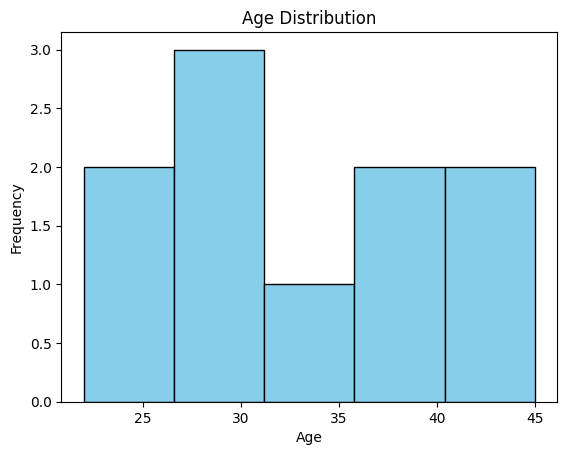

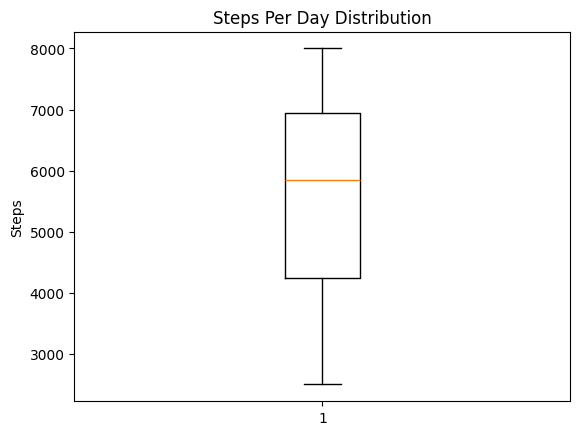

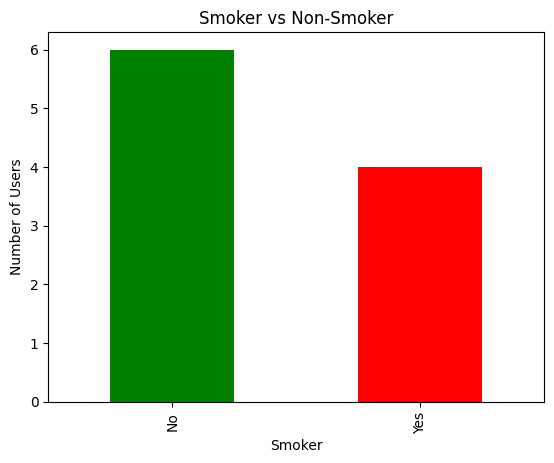

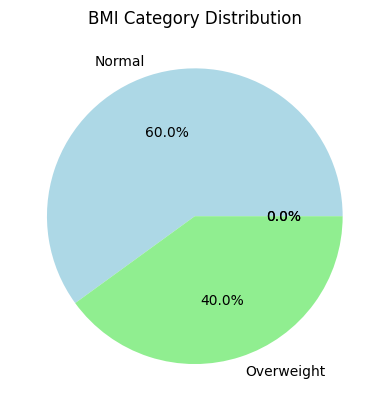

In [2]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Create a health dataset
data = {
    'UserID': range(101, 111),
    'Age': [25, 38, 29, 41, 22, 35, 45, 27, 31, 40],
    'Height_cm': [165, 172, 158, 180, 155, 170, 185, 160, 175, 178],
    'Weight_kg': [60, 78, 55, 85, 50, 70, 90, 58, 72, 82],
    'StepsPerDay': [5000, 7000, 3000, 8000, 2500, 6200, 4000, 5500, 7300, 6800],
    'Smoker': ['No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Step 3: Explore dataset
print("First 5 rows:\n", df.head())
print("\nSummary statistics:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique values in 'Smoker':", df['Smoker'].unique())

# Step 4: Clean Data
df.drop_duplicates(inplace=True)  # Remove duplicate rows

# Step 5: Variable Filters (selecting specific columns)
selected_columns = df[['Age', 'StepsPerDay', 'Smoker']]
print("\nSelected Columns:\n", selected_columns)

# Step 6: Row Filters
# a) Users with more than 6000 steps per day
active_users = df[df['StepsPerDay'] > 6000]
print("\nActive Users (Steps > 6000):\n", active_users)

# b) Non-smoking users aged above 30
non_smokers_above_30 = df[(df['Smoker'] == 'No') & (df['Age'] > 30)]
print("\nNon-Smokers Above 30:\n", non_smokers_above_30)

# Step 7: Visualizations

# a) Histogram of Age
plt.hist(df['Age'], bins=5, edgecolor='black', color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# b) Box plot of Steps per Day
plt.boxplot(df['StepsPerDay'])
plt.title('Steps Per Day Distribution')
plt.ylabel('Steps')
plt.show()

# c) Bar chart of Smoker counts
smoker_counts = df['Smoker'].value_counts()
smoker_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Smoker vs Non-Smoker')
plt.xlabel('Smoker')
plt.ylabel('Number of Users')
plt.show()

# d) Pie chart of BMI Category (calculated)
df['BMI'] = df['Weight_kg'] / ((df['Height_cm'] / 100) ** 2)
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                             labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

bmi_counts = df['BMI_Category'].value_counts()
bmi_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'orange', 'red'])
plt.title('BMI Category Distribution')
plt.ylabel('')
plt.show()
